In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import copy


In [2]:
path = 'voting_result.xlsx'
df = pd.read_excel(path, index_col=False)

lis_col = [i for i in df.columns if '率' not in i]
df = df[lis_col]
df.head()

,file,整体设计_原始图片得票,整体设计_生成图片得票,整体设计_两者相等得票,整体设计_总投票数,房间尺度与形态_原始图片得票,房间尺度与形态_生成图片得票,房间尺度与形态_两者相等得票,房间尺度与形态_总投票数,房间位置关系与流线_原始图片得票,...,房间位置关系与流线_两者相等得票,房间位置关系与流线_总投票数,采光与朝向_原始图片得票,采光与朝向_生成图片得票,采光与朝向_两者相等得票,采光与朝向_总投票数,公共空间形态_原始图片得票,公共空间形态_生成图片得票,公共空间形态_两者相等得票,公共空间形态_总投票数
0,city_large_A20-1-无-1.jpg,2,0,0,2,1,2,1,3,2,...,1,3,1,2,1,3,0,2,0,2
1,city_large_A7-1-无-1.jpg,2,1,1,3,2,1,1,3,2,...,1,3,1,2,1,3,1,2,1,3
2,city_large_F34-1-无-1.jpg,1,1,0,2,0,2,0,2,2,...,1,3,2,1,1,3,0,2,0,2
3,city_large_G136-2-无-2.jpg,1,2,1,3,1,2,1,3,1,...,0,2,2,1,0,2,2,0,0,2
4,city_large_I16-2-无-2.jpg,0,2,0,2,2,1,1,3,1,...,0,2,2,0,0,2,0,2,0,2


In [3]:
df.describe()

,整体设计_原始图片得票,整体设计_生成图片得票,整体设计_两者相等得票,整体设计_总投票数,房间尺度与形态_原始图片得票,房间尺度与形态_生成图片得票,房间尺度与形态_两者相等得票,房间尺度与形态_总投票数,房间位置关系与流线_原始图片得票,房间位置关系与流线_生成图片得票,房间位置关系与流线_两者相等得票,房间位置关系与流线_总投票数,采光与朝向_原始图片得票,采光与朝向_生成图片得票,采光与朝向_两者相等得票,采光与朝向_总投票数,公共空间形态_原始图片得票,公共空间形态_生成图片得票,公共空间形态_两者相等得票,公共空间形态_总投票数
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,0.961702,1.042553,0.225532,2.004255,1.025532,1.114894,0.361702,2.140426,1.097872,1.059574,0.378723,2.157447,1.144681,1.148936,0.510638,2.289362,0.995745,1.012766,0.229787,2.008511
std,0.693854,0.708841,0.418824,0.535076,0.640001,0.679045,0.498953,0.524469,0.675420,0.725500,0.503380,0.624207,0.644108,0.678697,0.541932,0.648217,0.669851,0.753799,0.421594,0.514669
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000
50%,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000
75%,1.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,1.000000,2.000000,0.000000,2.000000
max,2.000000,2.000000,1.000000,4.000000,2.000000,2.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000,4.000000


In [4]:
lis_small = []
lis_large = []
lis_rural = []

print(len(df))
for i in range(len(df)):
    file_name = df.loc[i, 'file']
    if file_name.startswith('city_small'):
        lis_small.append(i)
    elif file_name.startswith('city_large'):
        lis_large.append(i)
    elif file_name.startswith('rural'):
        lis_rural.append(i)

df_small = df.loc[lis_small, :]
df_large = df.loc[lis_large, :]
df_rural = df.loc[lis_rural, :]
df_all = copy.deepcopy(df)

235


In [5]:
len(df_small), len(df_large), len(df_rural)

(93, 38, 19)

In [6]:
# 比例统计

def percentage_calculate(data):
    data = data.drop('file', axis=1)
    se = data.sum()
    arr_groups = np.arange(len(se)) // 4
    groups = se.groupby(arr_groups)

    df_statistic = pd.DataFrame(columns=['one', 'two', 'difference'])  # one:人工，two:生成

    for idx, group in groups:
        total = group[0] + group[1]
        per_ori = (group[0] / total) * 100
        per_gen = (group[1] / total) * 100
        per_diff = per_gen - per_ori
        values = [per_ori, per_gen, per_diff]
        if idx == 0:
            df_statistic.loc['Overall', :] = values
            print('Overall', total)
        elif idx == 1:
            df_statistic.loc['Room size and shape', :] = values
            print('Room size and shape', total)
        elif idx == 2:
            df_statistic.loc['Spacial relationship', :] = values
            print('Spacial relationship', total)
        elif idx == 3:
            df_statistic.loc['Natural lighting', :] = values
            print('Natural lighting', total)
        else:
            df_statistic.loc['Public space shape', :] = values
            print('Public space shape', total)

    df_statistic = df_statistic.sort_values(by='difference')
    df_statistic = df_statistic.round(3)
    return df_statistic
        

small
Overall 188
Room size and shape 199
Spacial relationship 205
Natural lighting 211
Public space shape 190
[50.23696682464455 47.80487804878049 46.808510638297875 46.31578947368421
 46.231155778894475]


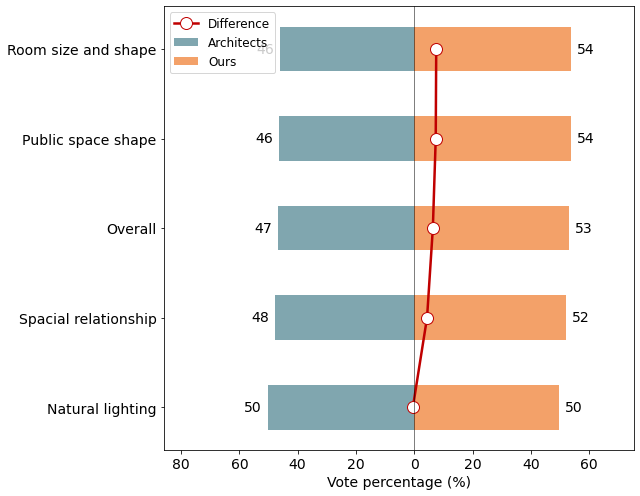

large
Overall 79
Room size and shape 87
Spacial relationship 85
Natural lighting 87
Public space shape 76
[59.77011494252874 52.94117647058824 50.63291139240506 47.368421052631575
 44.827586206896555]


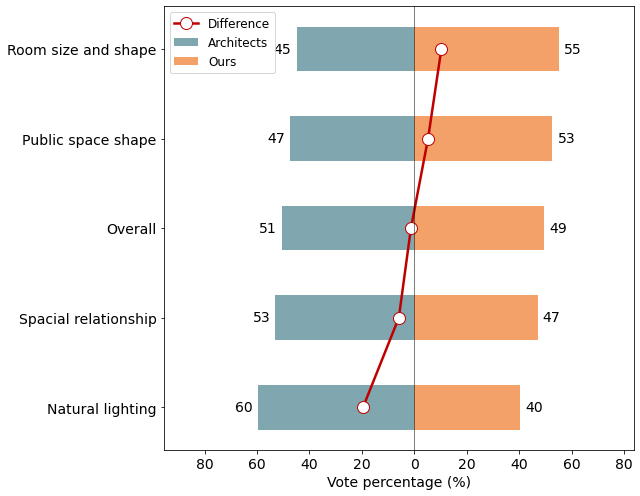

rural
Overall 36
Room size and shape 35
Spacial relationship 37
Natural lighting 46
Public space shape 35


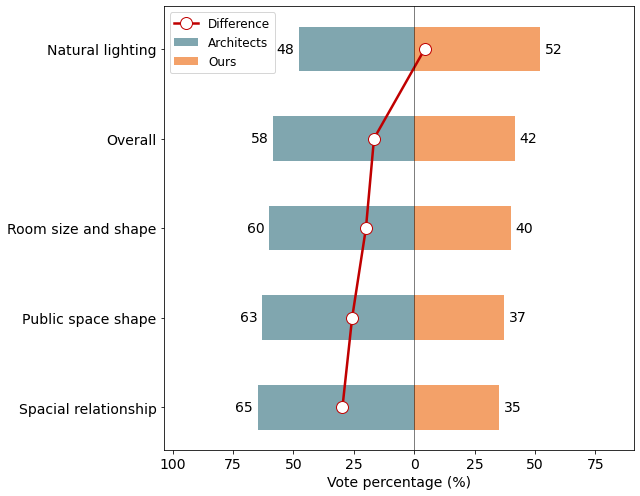

all
Overall 471
Room size and shape 503
Spacial relationship 507
Natural lighting 539
Public space shape 472
[50.887573964497044 49.90723562152134 49.57627118644068 47.983014861995755
 47.912524850894634]


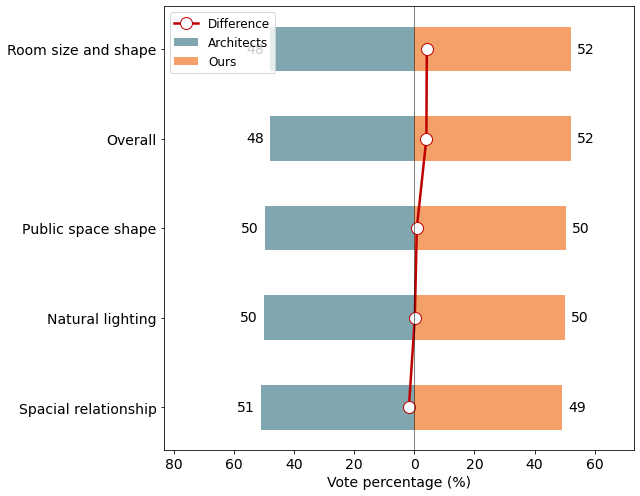

In [7]:

dic_df = {
    'small': df_small, 
    'large': df_large, 
    'rural': df_rural,
    'all': df_all
}


for key, df_sub in dic_df.items():
    print(key)
    df_out = percentage_calculate(data=copy.deepcopy(df_sub))
    # 数据定义
    if key != 'rural':
        categories = df_out.index
        values_left = df_out.loc[:, 'one'].values 
        print(values_left)
        values_right = df_out.loc[:, 'two'].values 
        values_diff = df_out.loc[:, 'difference'].values # 折线图数据
        
        # +4 -4 -8
        
    else:
        categories = df_out.index
        values_left = df_out.loc[:, 'one'].values
        values_right = df_out.loc[:, 'two'].values
        values_diff = df_out.loc[:, 'difference'].values  # 折线图数据

    # 创建图形和轴
    fig, ax = plt.subplots(figsize=(9, 7))

    # 绘制左侧柱状图（负值方向）
    bars_left = ax.barh(
        categories, 
        -values_left, 
        height=0.5, 
        color='#80A6AF', 
        label='Architects'
    )
    # 绘制右侧柱状图（正值方向）
    bars_right = ax.barh(
        categories, 
        values_right, 
        height=0.5, 
        color='#F3A169', 
        label='Ours'
    )

    # 添加折线图（表示 difference）
    ax.plot(
        values_diff, 
        range(len(categories)), 
        'o-', 
        color='#C00000', 
        linewidth=2.5, 
        markerfacecolor='white',  # 空心圆
        markersize=12,           # 可选：调整标记大小

        label='Difference'
    )

    # 添加数据标签（根据左右位置调整标签位置）
    for bars, direction in zip([bars_left, bars_right], ['left', 'right']):
        for bar in bars:
            y_pos = bar.get_y() + bar.get_height() / 2  # y 是类别位置
            x_start = bar.get_x()  # 柱子起始位置
            width = bar.get_width()  # 柱子的长度（水平方向）

            if direction == 'left':  # 左侧柱状图（负值方向）
                x_pos = x_start + width - 2  # 标签在柱子末端左侧
                ha = 'right'
            else:  # 右侧柱状图（正值方向）
                x_pos = x_start + width + 2   # 标签在柱子末端右侧
                ha = 'left'

            # 添加标签
            ax.annotate(
                f'{abs(width):.0f}',  # 显示绝对值
                xy=(x_pos, y_pos),
                xytext=(0, 0),  # 直接贴在柱子旁边
                textcoords="offset points",
                ha=ha,
                va='center',
                color='black',
                fontsize=14,
    #             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray", alpha=0.8)
            )

    # 设置横轴范围和参考线
    max_value = max(max(values_left), max(values_right))
    ax.set_xlim(-max_value * 1.6, max_value * 1.4)  # 根据最大值设置 x 轴范围
    ax.axvline(x=0, color='black', linewidth=0.5)  # 横轴参考线

    # 设置纵轴标签
    ax.set_yticks(range(len(categories)))
    ax.set_yticklabels(categories)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_xlabel('Vote percentage (%)', fontsize=14)
#     ax.set_title('(a) Compare with architects', fontsize=14) 

    # 设置横轴显示正值（负值显示为正值）
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{abs(x):.0f}'))

    # 添加图例
    ax.legend(
        loc='upper left', 
        fontsize=12
    )

    # 自动调整布局
    plt.tight_layout()

    # 保存图像（可选）
    plt.savefig(f'{key}.jpg', dpi=300, bbox_inches='tight')

    # 显示图像
    plt.show()